# Proyecto de consultas de Temperatura Iteractivo de Argentina 2023

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
ruta = '/Users/leidygarciaguzman/Documents/Bootcamp DS Udemy/Datos/Datos+Meteorológicos_Arg_2023.csv'
df=pd.read_csv(ruta)
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha                 1825 non-null   object 
 1   Ciudad                1825 non-null   object 
 2   Temperatura Maxima    1825 non-null   int64  
 3   Temperatura Minima    1825 non-null   int64  
 4   Precipitacion         1825 non-null   float64
 5   Velocidad del Viento  1825 non-null   float64
 6   Humedad Relativa      1825 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 99.9+ KB


In [11]:
df.describe()

,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,17.827945,10.191233,11.469205,24.963945,59.251890
std,8.139477,6.540120,27.714274,8.640341,17.282792
min,2.000000,-3.000000,0.000000,10.000000,30.000000
25%,12.000000,6.000000,0.000000,17.900000,44.400000
50%,17.000000,10.000000,0.000000,24.900000,58.200000
75%,23.000000,15.000000,0.000000,32.300000,74.800000
max,36.000000,22.000000,119.500000,40.000000,90.000000


In [12]:
df['Fecha']=pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha                 1825 non-null   datetime64[ns]
 1   Ciudad                1825 non-null   object        
 2   Temperatura Maxima    1825 non-null   int64         
 3   Temperatura Minima    1825 non-null   int64         
 4   Precipitacion         1825 non-null   float64       
 5   Velocidad del Viento  1825 non-null   float64       
 6   Humedad Relativa      1825 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 99.9+ KB


In [13]:
lista_ciudades = []
for c in df['Ciudad']:
    if c not in lista_ciudades:
        lista_ciudades.append(c)
lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [14]:
dict_meses = {1:'Enero',
              2:'Febrero',
              3:'Marzo',
              4:'Abril',
              5:'Mayo',
              6:'Junio',
              7:'Julio',
              8:'Agosto',
              9:'Septiembre',
              10:'Octubre',
              11:'Noviembre',
              12:'Diciembre'}

In [28]:
def consultar_temperaturas():
    while True:
        # Solicitar la ciudad 
        print('\nCiudades disponibles: ', lista_ciudades)
        ciudad_elegida = input('Elija la ciudad de la lista: ').title()
        
        #Solicitar el mes
        mes_elegido =int(input('Elija un número de mes del 1 al 12: '))
        
        #ValiDar los inputs 
        if ciudad_elegida not in lista_ciudades or mes_elegido not in range(1,13):
            print('Ciudad o mes no válidos. Inténtelo otra vez!')
            continue
            
        #Crear el dataframe filtrado
        datos_ciudad_mes = df[(df['Ciudad'] == ciudad_elegida) & (df['Fecha'].dt.month == mes_elegido)]
        
        #Graficamos las temperaturas del dataframe 
        plt.figure(figsize=(10, 6))
        plt.plot(datos_ciudad_mes['Fecha'],
                 datos_ciudad_mes['Temperatura Maxima'],
                 label='Maxima',
                 color='red')
        plt.plot(datos_ciudad_mes['Fecha'],
                 datos_ciudad_mes['Temperatura Minima'],
                 label='Minima',
                 color='blue')
        plt.title(f'Temperaturas en {ciudad_elegida} durante el mes de {dict_meses[mes_elegido]}')  # Corrección aquí
        plt.xlabel('Fecha')
        plt.ylabel('Temperaturas')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
                  
        #Pregunta al usuario si quiere continuar 
        otra_consulta = input('Deseas continuar consultando (s/n): ')
        if otra_consulta.lower() != 's':
                  break
        


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
Elija la ciudad de la lista: Cordoba
Elija un número de mes del 1 al 12: 12


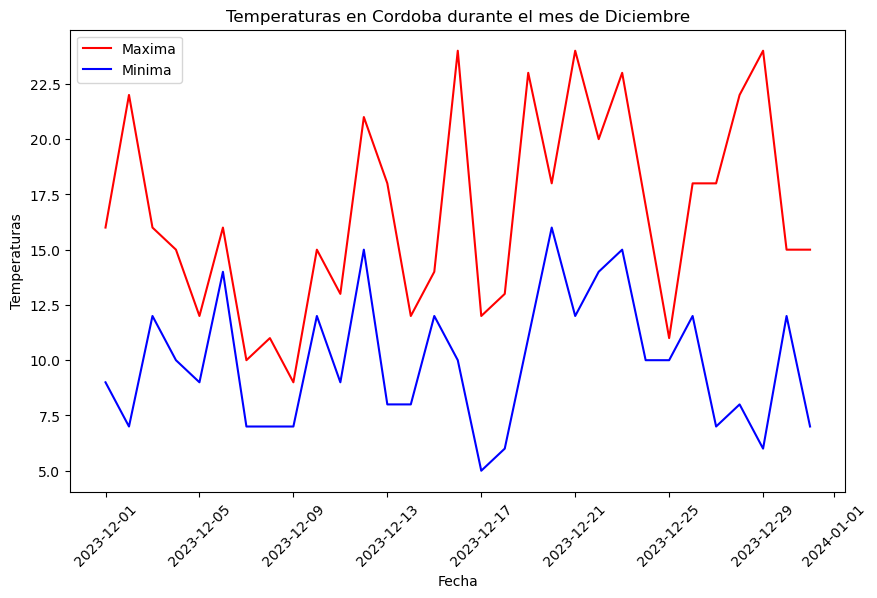

Deseas continuar consultando (s/n): s

Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']
Elija la ciudad de la lista: Rosario
Elija un número de mes del 1 al 12: 12


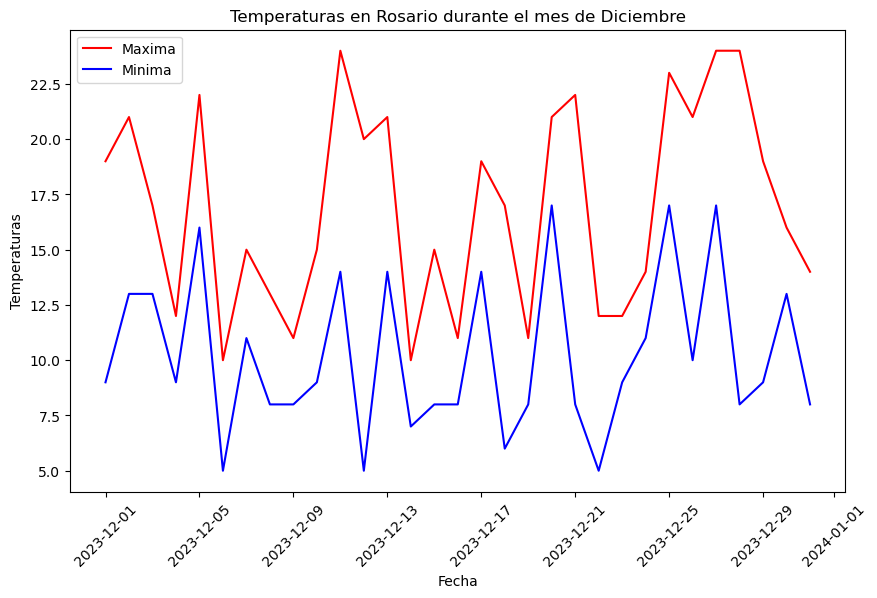

Deseas continuar consultando (s/n): Mendoza


In [30]:
consultar_temperaturas()